
#  Customer Churn Analysis – Telecom Dataset

## Day 5/7 – Customer Churn Analytics 

**Dataset:** Telecom Customer Churn (Kaggle)  
🔗 https://www.kaggle.com/datasets/blastchar/telco-customer-churn

### Project Objective
Customer churn directly impacts revenue.  
This analysis explores churn drivers and provides business-focused insights.


## Dataset Description


The dataset includes customer demographics, service subscriptions,
billing information, and a churn indicator (Yes/No).


## 1️ Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)


## 2️ Load Dataset

In [2]:

# Place 'WA_Fn-UseC_-Telco-Customer-Churn.csv' in the same folder
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3️ Data Cleaning & Preparation

In [3]:

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(inplace=True)
df["Churn_Flag"] = df["Churn"].map({"Yes": 1, "No": 0})
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Flag
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


## 4️ Overall Churn Rate

Overall Churn Rate: 26.58%


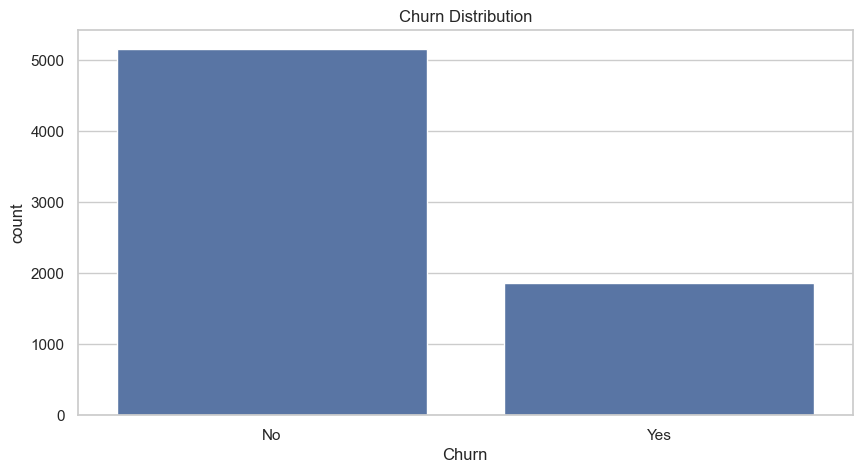

In [4]:

churn_rate = df["Churn_Flag"].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


## 5️ Contract Type vs Churn

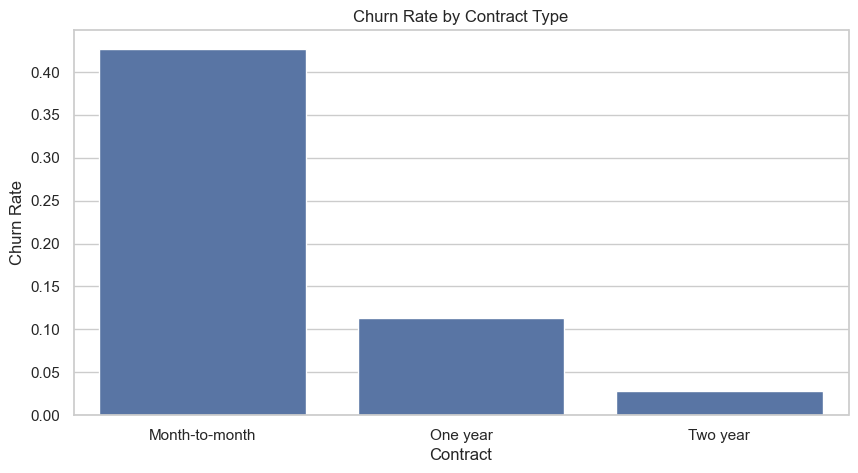

In [5]:

contract_churn = df.groupby("Contract")["Churn_Flag"].mean().sort_values(ascending=False)

sns.barplot(x=contract_churn.index, y=contract_churn.values)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()


## 6️ Tenure vs Churn

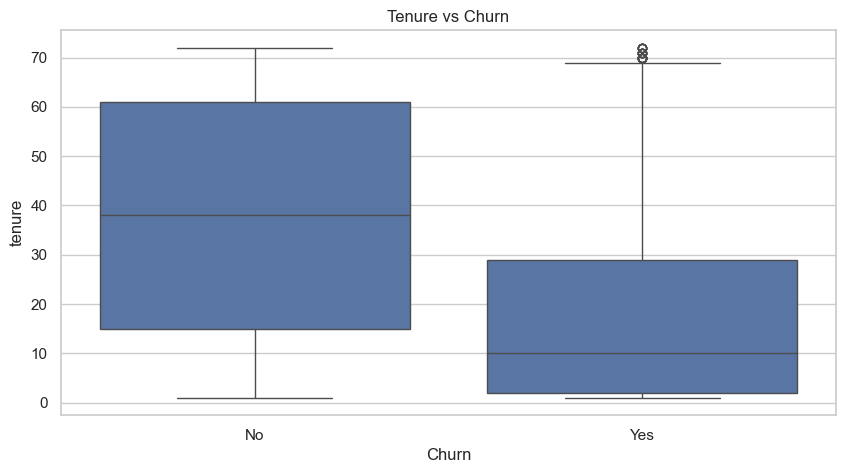

In [6]:

sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


## 7️ Monthly Charges vs Churn

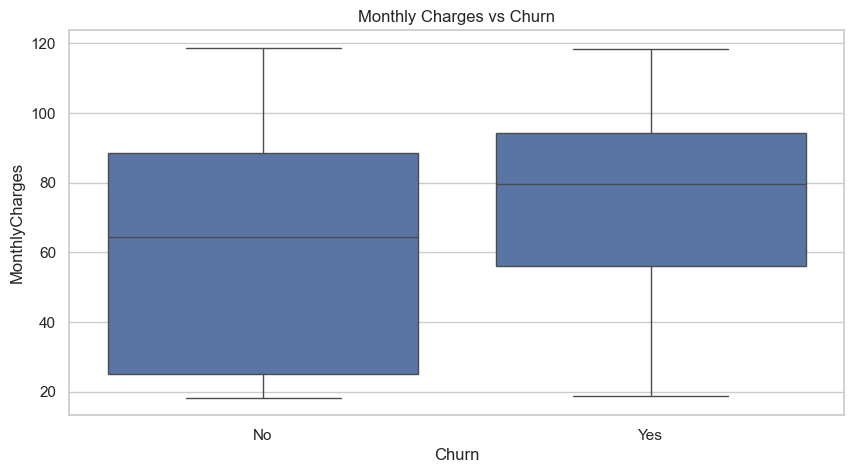

In [7]:

sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


## 8️ Correlation Analysis

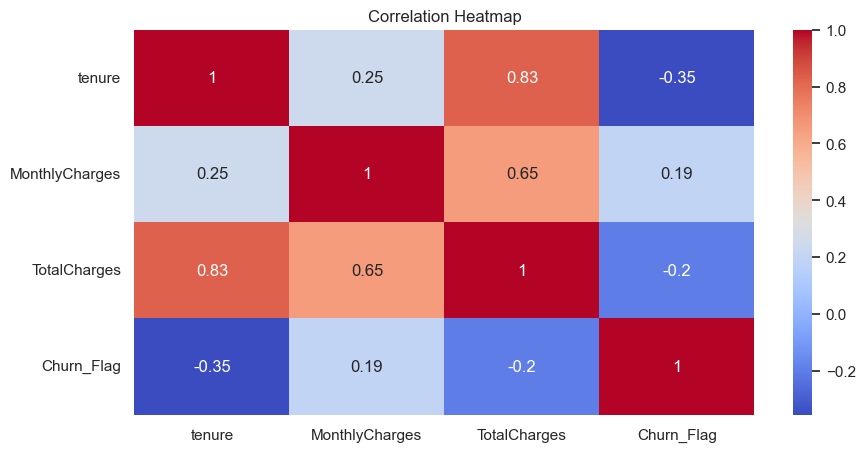

In [8]:

corr = df[["tenure", "MonthlyCharges", "TotalCharges", "Churn_Flag"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



## 9️ Key Business Insights

- Month-to-month contracts have the highest churn  
- Low-tenure customers are more likely to leave  
- Higher monthly charges increase churn probability  
- Long-term contracts reduce churn risk



## 🔍 Conclusion

Customer churn is driven primarily by contract structure, tenure, and pricing.
Targeted retention strategies can significantly reduce churn and protect revenue.
